### Homework 3.4 - Testing out filters

We are testing out the following filters:

- Low pass filter
- High pass filter
- Band filter
- Guassian blur filter

Pick an image of your choice and apply those filters on it.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

1.3835102


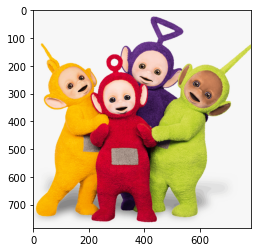

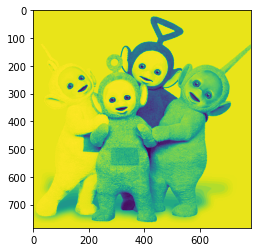

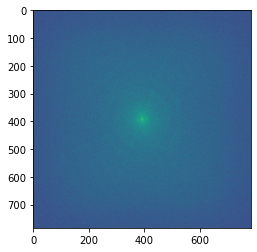

In [319]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab as py
from scipy import misc, fftpack
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

image = mpimg.imread('teletubbies2.png')
#image = mpimg.imread('pattern2.jpg')

grayim = image[:,:,0]



norm = np.sqrt(grayim.shape[0] * grayim.shape[1])

D1_image = fftpack.fft2(grayim)/norm
D2_image = fftpack.fftshift(D1_image)
#D3 = fftpack.fft2(D1)/norm

abs_image = np.abs(D2_image)**0.05
print(abs_image.max())
py.imshow(image)
py.show()
py.imshow(grayim)
py.show()
py.imshow(abs_image)
py.show()

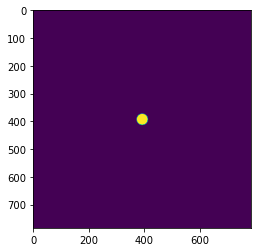

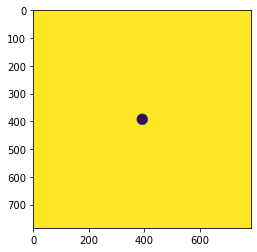

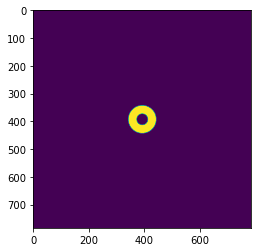

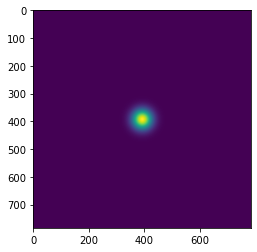

In [397]:
n = 785
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

R = 20
Big_R = 50

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

low_M = X**2 + Y**2 < R**2 #low pass 

high_M = X**2 + Y**2 > R**2 #high pass

band_M = np.logical_xor(X**2 + Y**2 < R**2, X**2 + Y**2 < Big_R**2)

sigma = 0.04

e = 2.71828182846

gaussian_M = (1/(2*np.pi*sigma**2))*np.exp(-(X**2 + Y**2)/2*sigma**2)

D1_low = fftpack.fft2(low_M)/n
D2_low = fftpack.fftshift(D1_low)
D3_low = fftpack.fft2(D1_low)/n


D1_high = fftpack.fft2(high_M)/n
D2_high = fftpack.fftshift(D1_high)
D3_high = fftpack.fft2(D1_high)/n

D1_band = fftpack.fft2(band_M)/n
D2_band = fftpack.fftshift(D1_band)
D3_band = fftpack.fft2(D1_band)/n


D1_g = fftpack.fft2(gaussian_M)/n
D2_g = fftpack.fftshift(D1_g)
D3_g = fftpack.fft2(D1_g)/n


#D3_low = fftpack.fft2(D1_low)/n
#print np.abs(D3)[:,50]
#plt.imshow(np.abs(D3_low))
plt.imshow(np.abs(D3_low))
plt.show()
plt.imshow(np.abs(D3_high))
plt.show()
plt.imshow(np.abs(D3_band))
plt.show()
plt.imshow(np.abs(D3_g))
plt.show()

[[210 210 210 ... 209 209 209]
 [210 210 210 ... 209 209 209]
 [209 210 210 ... 209 209 209]
 ...
 [210 210 210 ... 209 210 210]
 [210 210 210 ... 209 209 210]
 [210 210 210 ... 209 209 210]]


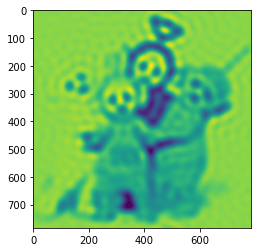

In [398]:
low_pass_image = low_M * D2_image
shifted_D2 = fftpack.fftshift(low_pass_image)
image_inv = fftpack.ifft2(shifted_D2)
image_inv = np.abs(image_inv)
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')
print(image_inv)
plt.imshow(image_inv)

[[0 1 1 ... 0 0 0]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


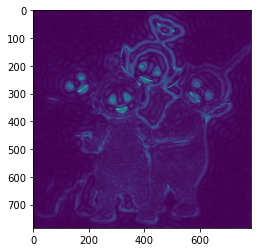

In [399]:
high_pass_image = high_M * D2_image
shifted_D2 = fftpack.fftshift(high_pass_image)
image_inv = fftpack.ifft2(shifted_D2)
image_inv = np.abs(image_inv)
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')
print(image_inv)
plt.imshow(image_inv)

[[0 0 0 ... 1 1 0]
 [1 1 1 ... 1 1 1]
 [2 2 2 ... 1 1 2]
 ...
 [1 2 2 ... 0 0 1]
 [0 1 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


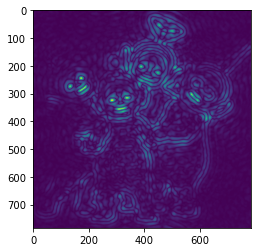

In [400]:
band_pass_image = band_M * D2_image
shifted_D2 = fftpack.fftshift(band_pass_image)
image_inv = fftpack.ifft2(shifted_D2)
image_inv = np.abs(image_inv)
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')
print(image_inv)
plt.imshow(image_inv)

[[248 248 248 ... 248 248 248]
 [248 248 248 ... 248 248 248]
 [248 248 248 ... 248 248 248]
 ...
 [248 248 248 ... 248 248 248]
 [248 248 248 ... 248 248 248]
 [248 248 248 ... 248 248 248]]


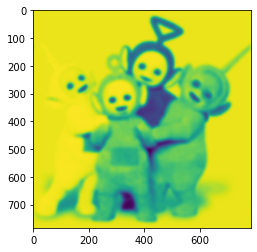

In [401]:
gaussian_pass_image = gaussian_M * D2_image
shifted_D2 = fftpack.fftshift(gaussian_pass_image)
image_inv = fftpack.ifft2(shifted_D2)
image_inv = np.abs(image_inv)
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')
print(image_inv)
plt.imshow(image_inv)

# What I did 
As you taught in class, the low pass filter and said that the high pass is the opposite of that I simply changed the mask M to be opposite logical operation. For band pass I used XOR and set 2 Radius one for inner and outer so the Mask will have space between. Gaussian, I used the formula in here to calcualte the coeffiecients https://softwarebydefault.com/2013/06/08/calculating-gaussian-kernels/ .